## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [31]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'].values, train_df['y_train'].values
x_train.shape

(500,)

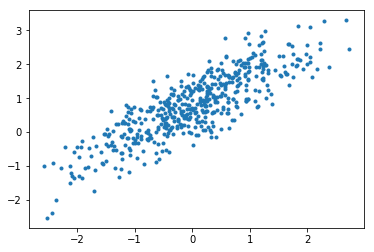

In [32]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [33]:
def training(iteration, learning_rate, theta):
    total_loss = []
    for iteration in range(n_iteration):
        y_pred_theta0 = []
        y_pred_theta1 = []
        loss = 0

        for i in range(len(x_train)):
            y_pred = theta[0] + theta[1] * x_train[i]
            y_pred_minus_true = y_pred - y_train[i]
            loss += y_pred_minus_true ** 2
            y_pred_theta0.append(y_pred_minus_true)
            y_pred_theta1.append(y_pred_minus_true * x_train[i])

        y_pred_theta0 = np.array(y_pred_theta0)
        partial_theta0 = np.sum(y_pred_theta0, axis=0) / len(x_train)
        y_pred_theta1 = np.array(y_pred_theta1)
        partial_theta1 = np.sum(y_pred_theta1, axis=0) / len(x_train)
        total_loss.append(loss)
        theta[0] = theta[0] - learning_rate * partial_theta0
        theta[1] = theta[1] - learning_rate * partial_theta1

        if iteration % 1000 == 0:
            print("Iteration = {}, loss = {}".format(iteration, loss))
    return theta, total_loss

- Parameters
    - number of training iteration: 30000
    - learning rate: 1e-4
    - initital theta ~ N(0,1)

- Function
    - training:
        - Input: number of iteration, learning rate, initital theta
        - Output: theta after training, loss of each iteration
        - Details:
            ```  
            repeat n_iteration {
                partial_theta0 = learning_rate * 1 / len(x_train) * sum(f(x[i]) - y[i])
                partial_theta1 = learning_rate * 1 / len(x_train) * sum(f(x[i]) - y[i]) * x[i]
                theta0 := theta0 - learning_rate * partial_theta0
                theta1 := theta1 - learning_rate * partial_theta1
            }
            ```

In [43]:
n_iteration = 30000
learning_rate = 1e-4
sigma = 1
theta = np.random.normal(0, sigma, 2)
theta, total_loss = training(n_iteration, learning_rate, theta)
print("weight = {}".format(theta))

Iteration = 0, loss = 688.5916562166029
Iteration = 1000, loss = 588.8065959851692
Iteration = 2000, loss = 506.9736132460529
Iteration = 3000, loss = 439.86147276013196
Iteration = 4000, loss = 384.8208088658622
Iteration = 5000, loss = 339.67929578949213
Iteration = 6000, loss = 302.65571277336625
Iteration = 7000, loss = 272.28949681216545
Iteration = 8000, loss = 247.38299046938306
Iteration = 9000, loss = 226.95409598666657
Iteration = 10000, loss = 210.1974597294594
Iteration = 11000, loss = 196.45264934708743
Iteration = 12000, loss = 185.17806331305798
Iteration = 13000, loss = 175.92953977166957
Iteration = 14000, loss = 168.3428178798697
Iteration = 15000, loss = 162.11915749783395
Iteration = 16000, loss = 157.01354821116544
Iteration = 17000, loss = 152.82504123051774
Iteration = 18000, loss = 149.3888217823793
Iteration = 19000, loss = 146.56970851443873
Iteration = 20000, loss = 144.25682292474022
Iteration = 21000, loss = 142.35921812672825
Iteration = 22000, loss = 140.

### Plot regression of training data

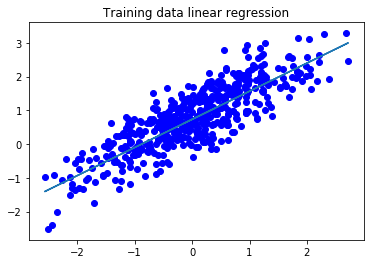

In [44]:
fig = plt.figure()
plt.title("Training data linear regression")
plt.scatter(x_train, y_train, c='blue')
predict_func = np.poly1d(np.flip(theta))
y_train_pred = predict_func(x_train)
plt.plot(x_train, y_train_pred)

### Plot learning curve of training data

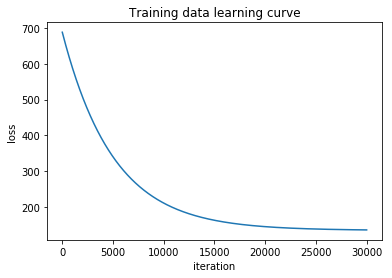

In [45]:
fig = plt.figure()
plt.title("Training data learning curve")
iterations = [_ for _ in range(n_iteration)]
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(iterations, total_loss)

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [46]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

- Function
    - model:
        - Input: x, theta
        - Output: y
        - Details:
            ```  
            y = theta0 + theta1 * x
            ```
    - MSE:
        - Input: predict y, true y
        - Output: total error
        - Details:
            ```
            error = sum((y_pred - y_true) ** 2) / n
            ```

In [47]:
def model(x, theta):
    y_pred = []
    for i in range(len(x)):
        y_pred.append(theta[0] + theta[1] * x[i])
    return y_pred

In [48]:
y_pred = model(x_test, theta)

In [49]:
def MSE(y_pred, y_test):
    error = 0
    for i in range(len(y_pred)):
        error += (y_pred[i] - y_test[i]) ** 2
    error /= len(y_pred)
    return error

In [50]:
mse = MSE(y_pred, y_test)
print("MSE error = {}".format(mse))

MSE error = 0.06618470253012981


### Plot regression of testing data

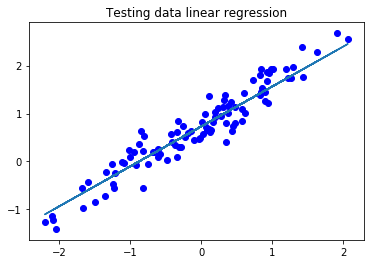

In [51]:
fig = plt.figure()
plt.title("Testing data linear regression")
plt.scatter(x_test, y_test, c='blue')
predict_func = np.poly1d(np.flip(theta))
y_test_pred = predict_func(x_test)
plt.plot(x_test, y_test_pred)